# TFG - Fórmula 1 - ML

Autor: Manuel Ventura Pacheco

Obtener archivos con los embeddings del modelo con capa de *lookup* para mostrar en la herramienta [Embedding Projector](https://projector.tensorflow.org/) de Tensorflow.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, Dropout, Input, Flatten, BatchNormalization, concatenate, AlphaDropout

from google.colab import drive

import io
import os
import re
import shutil

## Read files

In [ ]:
read_dir = '/content/drive/MyDrive/Universidad/TFG/data_ready/'
save_dir = '/content/drive/MyDrive/Universidad/TFG/models/'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model(save_dir+'nn_model_categorical')
df = pd.read_csv(read_dir+'LEARNING_DF_NORMAL.csv')
df = df.loc[df['year'] >= 2000].copy()
drivers = pd.read_csv(read_dir+'drivers.csv')
drivers['fullName'] = drivers['forename'] + drivers['surname']
constructors = pd.read_csv(read_dir+'constructors.csv')
circuits = pd.read_csv(read_dir+'circuits.csv')

## Prepare data

In [ ]:
driverIds = set(df['driverId'])
constructorIds = set(df['constructorId'])
circuitIds = set(df['circuitId'])

In [ ]:
drivers = drivers.drop(['driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], axis=1)
constructors = constructors.drop(['constructorRef', 'nationality', 'url'], axis=1)
circuits = circuits.drop(['circuitRef', 'location', 'country', 'lat', 'lng', 'alt', 'url'], axis=1)

In [ ]:
drivers = drivers[drivers['driverId'].isin(driverIds)]
constructors = constructors[constructors['constructorId'].isin(constructorIds)]
circuits = circuits[circuits['circuitId'].isin(circuitIds)]

## Obtain embeddings

In [ ]:
driver_vocab = model.get_layer('Driver_Lookup').get_vocabulary()
driver_embedding = model.get_layer('Driver_Embeddding').get_weights()[0]

const_vocab = model.get_layer('Constructor_Lookup').get_vocabulary()
constructor_embedding = model.get_layer('Constructor_Embedding').get_weights()[0]

circuit_vocab = model.get_layer('Circuit_Lookup').get_vocabulary()
circuit_embedding = model.get_layer('Circuit_Embedding').get_weights()[0]

In [ ]:
# Driver embeddings
out_v = io.open('driver_vectors_cat.tsv', 'w', encoding='utf-8')
out_m = io.open('driver_metadata_cat.tsv', 'w', encoding='utf-8')

for index, word in enumerate(driver_vocab):
  vec = driver_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [ ]:
# Constructor embeddings
out_v = io.open('constructor_vectors_cat.tsv', 'w', encoding='utf-8')
out_m = io.open('constructor_metadata_cat.tsv', 'w', encoding='utf-8')

for index, word in enumerate(const_vocab):
  vec = constructor_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [ ]:
# Circuit embeddings
out_v = io.open('circuit_vectors_cat.tsv', 'w', encoding='utf-8')
out_m = io.open('circuit_metadata_cat.tsv', 'w', encoding='utf-8')

for index, word in enumerate(circuit_vocab):
  vec = circuit_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [ ]:
try:
  from google.colab import files
  for file_vec in ['driver_vectors_cat.tsv', 'driver_metadata_cat.tsv',
                   'constructor_vectors_cat.tsv', 'constructor_metadata_cat.tsv',
                   'circuit_vectors_cat.tsv', 'circuit_metadata_cat.tsv']:
    files.download(file_vec)
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

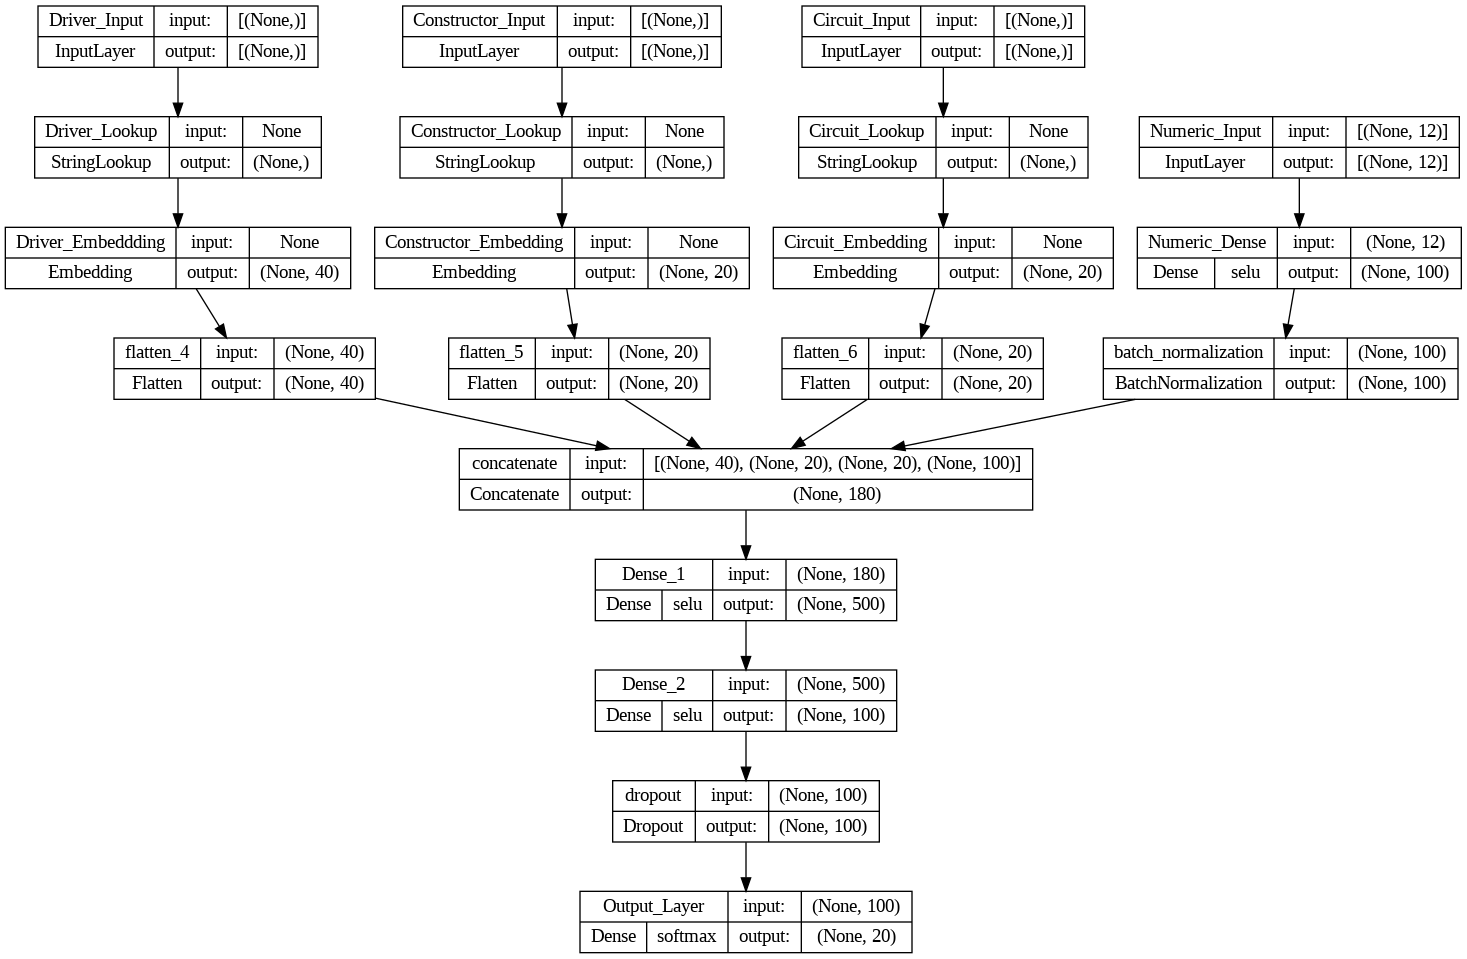

In [ ]:
keras.utils.plot_model(model,
                       show_shapes=True,
                       show_layer_activations=True)